In [15]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
!pip install koreanize-matplotlib

<Axes: title={'center': '한글'}>

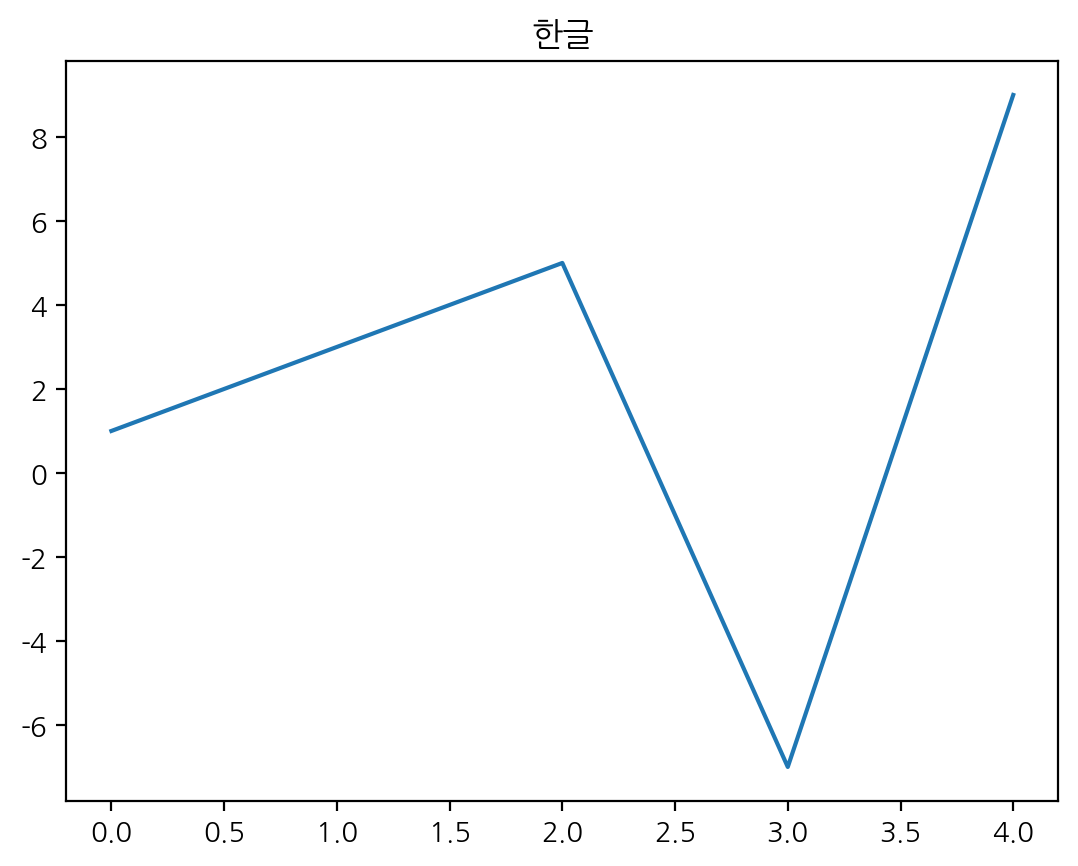

In [17]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9]).plot(title="한글")


In [18]:
path = '/content/new_year_dazim.csv'

In [19]:
pd.read_csv(path)

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
...,...
2444,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 ***님의 JPA 강의를 또 스..."
2445,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2446,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...


In [20]:
raw = pd.read_csv(path)

In [21]:
# 원본은 따로 보존
df = raw.copy()
df.head(3)

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기


In [22]:
df.shape

(2449, 1)

데이터 전처리

In [23]:
# 데이터 전처리

# 중복 여부 확인 >> 제거
# drop_duplicates

df = df.drop_duplicates(['text'], keep='last')
# 중복 제거 후, 마지막 글을 남김
df.shape

(2410, 1)

In [24]:
# (영문) 소문자 변환

df['text'] = df['text'].str.lower()
df.head(3)

<ipython-input-24-fd767041aceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [25]:
# str.replace()
# replace() / str.replace()
# >> replace() : 텍스트가 완전히 일치할 때 사용
# >> str.replace(): 문자(열) 일부만 일치할 때, 원하는 텍스트로 변경 가능

df['text'] = df['text'].str.replace(
        "python","파이썬").str.replace(
        "pandas","판다스").str.replace(
        "javascript","자바스크립트").str.replace(
        "java","자바").str.replace(
        "react","리액트"
        )

<ipython-input-25-f190f82c1640>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace(


In [26]:
df.head(3)

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [27]:
# 문자열 분리로 관심 강의(기준) 분리
# 신사동, 신사 동 >> 신사동 통일 / 관심 강의, 관심 강좌 >> course

df['text'].apply(lambda x: x.split("관심강의")[-1])
# 관심강의 기준 텍스트 분리, 관심강의 뒤에 있는 텍스트를 가져옴

0       2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1       2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...
3                   40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4                         2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5                       2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!
                              ...                        
2444                                        : 스프링 데이터 jpa
2445                                      : 스프링 부트 개념과 활용
2446                  : 에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2447            : 파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2448                                        : ***의 파이썬 활용
Name: text, Length: 2410, dtype: object

In [33]:
df['course'] = df['text'].apply(lambda x: x.split("관심강의")[-1])
df['course']

0       2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1       2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...
3                   40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4                         2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5                       2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!
                              ...                        
2444                                        : 스프링 데이터 jpa
2445                                      : 스프링 부트 개념과 활용
2446                  : 에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2447            : 파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2448                                        : ***의 파이썬 활용
Name: course, Length: 2410, dtype: object

In [34]:
df['course'] = df['course'].apply(lambda x: x.split("관심 강의")[-1])
df['course'] = df['course'].apply(lambda x: x.split("관심 강좌")[-1])
df.head(3)

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


In [35]:
df['course'] = df['course'].str.replace(":","")
df['course'].head()

0    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
4                       2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
5                     2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
Name: course, dtype: object

In [36]:
df.head(3)

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급


In [37]:
# 특정 키워드가 들어가는 댓글을 찾고 싶어요.

search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터',
                  'django', '크롤링', '시각화', '데이터분석',
                  '웹개발', '엑셀', 'c', '자바', '자바스크립트',
                  'node', 'vue', '리액트']

In [38]:
for keyword in search_keyword:
    df[keyword]= df['course'].str.contains(keyword)

In [39]:
df.head(3)

,text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
# 파이썬|공공데이터|판다스 라는 텍스트가 들어가 있는 데이터가 있나?

df[df['text'].str.contains("파이썬|공공데이터|판다스")]

,text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
21,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,파이썬 머신러닝 완벽가이드,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25,"#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파...",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
29,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,"마음으로는 모든 강의가 듣고싶지만, 한가지씩 해나가고싶습니다. 우선은 파이썬부터 시...",파이썬 사용자를 위한 웹개발 입문 a to z django + bootstrap,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
2432,주니어개발자입니다. 토이프로젝트를 꼭 해보고 싶습니다. 올해엔 자바스크립트기초를 탄...,"파이썬입문과 크롤링기초 부트캠프 [쉽게! 하지만, 견고한 자료로!],node.js로...",False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2435,"올해는 파이썬과 r을 자유롭게 사용하고 싶어요..\n데이타 마이닝과, 업무능률향상 ...","올해는 파이썬과 r을 자유롭게 사용하고 싶어요..\n데이타 마이닝과, 업무능률향상 ...",False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [41]:
df_python = df[df['text'].str.contains("파이썬|공공데이터|판다스")]
df_python.shape

(429, 19)

In [43]:
df[search_keyword].sum()

머신러닝      133
딥러닝        52
파이썬       405
판다스         6
공공데이터      12
django     31
크롤링        56
시각화        30
데이터분석      24
웹개발        27
엑셀         18
c         409
자바        341
자바스크립트    140
node      117
vue       132
리액트       137
dtype: int64

In [44]:
df[search_keyword].sum().sort_values(ascending=False) # 내림차순 정렬

c         409
파이썬       405
자바        341
자바스크립트    140
리액트       137
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        52
django     31
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [45]:
# 공공데이터 텍스트가 들어간 문장만 찾고 싶어

df.loc[(df['공공데이터']==True), "text"]

25      #관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...
29      자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...
52      올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..\n\n#관심강의: 공...
92      it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다....
299           파이썬 데이터분석 마스터\n#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
387     올해 졸업하는 컴퓨터공학과 학생입니다!\n백엔드 혹은 데이터 엔지니어 쪽으로 취업하...
572     텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확...
600     데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... ...
710     2020년에는 데이터 분석쪽으로 이직하고 싶어요! 인프런 강의 듣고 이직에 성공하고...
906     경영학과 졸업생입니다. 새해엔 엑셀! 파이썬! 취직! 해내겠습니다. 좋은 강의, 커...
1365    인프런으로 파이썬 기초문법부터 입문했어요! 실무 데이터분석에 활용할 수 있는 수준으...
1388    나만의 프로젝트 하나 완성할 수 있을 정도의 지식 쌓기!\n#관심강의:공공데이터로 ...
Name: text, dtype: object

In [46]:
text = df.loc[(df['공공데이터']==True), "text"]

for t in text:
    print("--"*30)
    print(t)

------------------------------------------------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
------------------------------------------------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
------------------------------------------------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
------------------------------------------------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
------------------------------------------------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
------------------------------------------------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
------------------------------------------------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 **

In [47]:
# '판다스' 라는 텍스트가 들어가는 내용만 찾음

df.loc[df['판다스']==True, "text"]

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
758            판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : *** 판다스
1237      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2155    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2365    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

In [48]:
# 빈도수 계산을 위한 텍스트 데이터 벡터화(숫자 변환)
# >> bow(bag of words) 토큰화 해서 담기

"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer='word',
    tokenizer=None,  # 토큰나이저 따로 지정 가능
    preprocessor=None, # 전처리 도구
    stop_words = None, # 불용어 (stopwords): 지정해서 넣을 수 있음
    min_df = 2,
    ngram_range=(3,6),
    max_features = 2000 # 생성할 feature 수(단어 수)
)

In [50]:
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(3, 6))

In [52]:
df['course'].head(3)

0    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
Name: course, dtype: object

In [53]:
vectorizer.fit_transform(df['course'])

<2410x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 11173 stored elements in Compressed Sparse Row format>

In [54]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(2410, 2000)

In [55]:
feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
vocab = vectorizer.get_feature_names_out()
print(len(vocab))

2000


In [57]:
vocab[:10]

array(['12개 만들면서 배우는', '12개 만들면서 배우는 ios', '12개 만들면서 배우는 ios 아이폰',
       '12개 만들면서 배우는 ios 아이폰 개발', '12개를 만들며 배우는', '12개를 만들며 배우는 swift4',
       '12개를 만들며 배우는 swift4 ios11', '12개를 만들며 배우는 swift4 ios11 아이폰',
       '2018 do it', '2018 do it 안드로이드'], dtype=object)

In [59]:
# 각 review 마다 등장하는 단어에 빈도수가 표현됨 (0 : 등장하지 않음)
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
np.sum(feature_vector, axis=0)

matrix([[2, 2, 2, ..., 2, 2, 2]])

In [61]:
dist = np.sum(feature_vector, axis=0)

pd.DataFrame(dist, columns=vocab)

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,2,2,2,2,2,2,2,2,2,2,...,16,13,13,12,2,8,8,2,2,2


In [62]:
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq.T

,0
12개 만들면서 배우는,2
12개 만들면서 배우는 ios,2
12개 만들면서 배우는 ios 아이폰,2
12개 만들면서 배우는 ios 아이폰 개발,2
12개를 만들며 배우는,2
...,...
활용한 리액트 native,8
활용한 리액트 native 개발,8
활용한 메신져 만들기,2
활용한 메신져 만들기 android,2


In [63]:
df_freq.T.sort_values(by=0, ascending=False).head(30)

,0
nodebird sns 만들기,60
스프링 데이터 jpa,59
리액트로 nodebird sns,49
머신러닝 완벽 가이드,49
리액트로 nodebird sns 만들기,49
파이썬 머신러닝 완벽,49
프로그래밍과 자바스크립트 es6,48
파이썬 머신러닝 완벽 가이드,48
함수형 프로그래밍과 자바스크립트 es6,47
2020년 공부 목표,47


In [64]:
df_freq.T.reset_index()

,index,0
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2
...,...,...
1995,활용한 리액트 native,8
1996,활용한 리액트 native 개발,8
1997,활용한 메신져 만들기,2
1998,활용한 메신져 만들기 android,2


In [65]:
df_freq_t = df_freq.T.reset_index()
df_freq_t.columns = ['course', 'freq']

df_freq_t.head()

,course,freq
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2


In [66]:
df_freq_t['course']

0                  12개 만들면서 배우는
1              12개 만들면서 배우는 ios
2          12개 만들면서 배우는 ios 아이폰
3       12개 만들면서 배우는 ios 아이폰 개발
4                  12개를 만들며 배우는
                 ...           
1995             활용한 리액트 native
1996          활용한 리액트 native 개발
1997                활용한 메신져 만들기
1998        활용한 메신져 만들기 android
1999              활용한 파이썬 프로그래밍
Name: course, Length: 2000, dtype: object

In [68]:
df_freq_t['course'].str.replace("박조은","")

0                  12개 만들면서 배우는
1              12개 만들면서 배우는 ios
2          12개 만들면서 배우는 ios 아이폰
3       12개 만들면서 배우는 ios 아이폰 개발
4                  12개를 만들며 배우는
                 ...           
1995             활용한 리액트 native
1996          활용한 리액트 native 개발
1997                활용한 메신져 만들기
1998        활용한 메신져 만들기 android
1999              활용한 파이썬 프로그래밍
Name: course, Length: 2000, dtype: object

In [69]:
df_freq_t['course_find'] = df_freq_t['course'].str.replace("박조은","")
# 강좌명에 있는 강사 이름을 빈문자열로 변경

df_freq_t['course_find'].apply(lambda x: " ".join(x.split()[:4]))

0              12개 만들면서 배우는
1          12개 만들면서 배우는 ios
2          12개 만들면서 배우는 ios
3          12개 만들면서 배우는 ios
4              12개를 만들며 배우는
               ...         
1995         활용한 리액트 native
1996      활용한 리액트 native 개발
1997            활용한 메신져 만들기
1998    활용한 메신져 만들기 android
1999          활용한 파이썬 프로그래밍
Name: course_find, Length: 2000, dtype: object

In [70]:
df_freq_t['course_find'] = df_freq_t['course_find'].apply(lambda x: " ".join(x.split()[:4]))

In [71]:
df_freq_t

,course,freq,course_find
0,12개 만들면서 배우는,2,12개 만들면서 배우는
1,12개 만들면서 배우는 ios,2,12개 만들면서 배우는 ios
2,12개 만들면서 배우는 ios 아이폰,2,12개 만들면서 배우는 ios
3,12개 만들면서 배우는 ios 아이폰 개발,2,12개 만들면서 배우는 ios
4,12개를 만들며 배우는,2,12개를 만들며 배우는
...,...,...,...
1995,활용한 리액트 native,8,활용한 리액트 native
1996,활용한 리액트 native 개발,8,활용한 리액트 native 개발
1997,활용한 메신져 만들기,2,활용한 메신져 만들기
1998,활용한 메신져 만들기 android,2,활용한 메신져 만들기 android


In [72]:
df_freq_t.sort_values(['course_find','freq'], ascending=False).head(10)

,course,freq,course_find
1999,활용한 파이썬 프로그래밍,2,활용한 파이썬 프로그래밍
1998,활용한 메신져 만들기 android,2,활용한 메신져 만들기 android
1997,활용한 메신져 만들기,2,활용한 메신져 만들기
1996,활용한 리액트 native 개발,8,활용한 리액트 native 개발
1995,활용한 리액트 native,8,활용한 리액트 native
1994,활용한 데이터분석과 it보안,2,활용한 데이터분석과 it보안
1992,활용한 다양한 자동화 어플리케이션,13,활용한 다양한 자동화 어플리케이션
1993,활용한 다양한 자동화 어플리케이션 제작하기,12,활용한 다양한 자동화 어플리케이션
1991,활용한 다양한 자동화,13,활용한 다양한 자동화
1989,활용2 api 개발과 성능,16,활용2 api 개발과 성능


In [73]:
# 3개의 ngram과 빈도수로 역순 정렬 >> 빈도수가 높고
# ngram  수가 많은 순으로 정렬

print(df_freq_t.shape)

(2000, 3)


In [74]:
# 중복 제거
df_course = df_freq_t.drop_duplicates(['course_find', 'freq'], keep='first')
print(df_course.shape)

(1441, 3)


In [75]:
df_course = df_course.sort_values(by='freq', ascending=False)
df_course.head(20)

,course,freq,course_find
319,nodebird sns 만들기,60,nodebird sns 만들기
1094,스프링 데이터 jpa,59,스프링 데이터 jpa
885,리액트로 nodebird sns 만들기,49,리액트로 nodebird sns 만들기
1761,파이썬 머신러닝 완벽,49,파이썬 머신러닝 완벽
906,머신러닝 완벽 가이드,49,머신러닝 완벽 가이드
884,리액트로 nodebird sns,49,리액트로 nodebird sns
1891,프로그래밍과 자바스크립트 es6,48,프로그래밍과 자바스크립트 es6
1762,파이썬 머신러닝 완벽 가이드,48,파이썬 머신러닝 완벽 가이드
1936,함수형 프로그래밍과 자바스크립트 es6,47,함수형 프로그래밍과 자바스크립트 es6
1935,함수형 프로그래밍과 자바스크립트,47,함수형 프로그래밍과 자바스크립트


In [76]:
df_course.to_csv('dazim_event_course_freq.csv')

TF-IDF 가중치 주어 벡터화

In [ ]:
'''
TfidfTransformer()

1. norm ='l2' : 벡터 정규화
>> l2 : 벡터의 각 원소의 제곱의 합 = 1 (유클리디안 거리)
>> l1 : 벡터의 각 원소의 절대값의 합 = 1 (맨하탄 거리)

2. smooth_idf = False
>> feature 생성시, 0으로 나오는 항목에 대해 아주 작은 값 더해서(smoothing)
>> feature 만들지 아니면 그냥 생성할지 결정

3. use_idf = True
>> tf-idf 사용해 feature 만들지 아니면 단어 빈도 자체 사용할지 결정

'''

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
# 왜 tfidftransformer?
# 가중치를 주어서 vector(숫자)로 변환
# transformer라는 변수에 저장, 재사용

tfidftrans = TfidfTransformer(smooth_idf=False)
tfidftrans

TfidfTransformer(smooth_idf=False)

In [78]:
feature_vector

<2410x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 11173 stored elements in Compressed Sparse Row format>

In [81]:
feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
tfidftrans.fit_transform(feature_vector)

<2410x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11173 stored elements in Compressed Sparse Row format>

In [80]:
feature_tfidf = tfidftrans.fit_transform(feature_vector)
feature_tfidf.shape

(2410, 2000)

In [82]:
feature_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
pd.DataFrame(feature_tfidf.toarray(), columns=vocab)

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.235027,0.235027,0.23805,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
pd.DataFrame(tfidf_freq.sum())

,0
12개 만들면서 배우는,0.554700
12개 만들면서 배우는 ios,0.554700
12개 만들면서 배우는 ios 아이폰,0.554700
12개 만들면서 배우는 ios 아이폰 개발,0.554700
12개를 만들며 배우는,0.577350
...,...
활용한 리액트 native,1.706924
활용한 리액트 native 개발,1.706924
활용한 메신져 만들기,0.894427
활용한 메신져 만들기 android,0.894427


In [85]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
스프링 데이터 jpa,35.203215
파이썬 실전 활용,27.690173
nodebird sns 만들기,26.817724
머신러닝 완벽 가이드,24.470756
파이썬 머신러닝 완벽,24.470756
리액트로 nodebird sns,24.187518
리액트로 nodebird sns 만들기,24.187518
파이썬 머신러닝 완벽 가이드,23.569611
프로그래밍과 자바스크립트 es6,20.056301
함수형 프로그래밍과 자바스크립트 es6,19.143864


In [86]:
df_tfidf_top.index

Index(['스프링 데이터 jpa', '파이썬 실전 활용', 'nodebird sns 만들기', '머신러닝 완벽 가이드',
       '파이썬 머신러닝 완벽', '리액트로 nodebird sns', '리액트로 nodebird sns 만들기',
       '파이썬 머신러닝 완벽 가이드', '프로그래밍과 자바스크립트 es6', '함수형 프로그래밍과 자바스크립트 es6',
       ...
       '프론트엔드 영역 자유롭게 구사하는', '프론트엔드 영역 자유롭게', '자유롭게 구사하는 기술 보유하여 스스로의 웹페이지를',
       '자유롭게 구사하는 기술 보유하여 스스로의', '자유롭게 구사하는 기술 보유하여', '인프런 강의명 vue',
       '인프런 강의명 vue js', '인프런 강의명 vue js 완벽', '인프런 강의명 vue js 완벽 가이드',
       '강좌 tdd 개발 방법론을 활용한 리액트'],
      dtype='object', length=2000)

In [87]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:30]:
    print(t)

스프링 데이터 jpa
파이썬 실전 활용
nodebird sns 만들기
머신러닝 완벽 가이드
파이썬 머신러닝 완벽
리액트로 nodebird sns
리액트로 nodebird sns 만들기
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
따라하며 배우는 c언어
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
2020년 공부 목표
실전 스프링 데이터 jpa
파이썬 머신러닝 완벽가이드
관심있는 인프런 강의명
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa 프로그래밍
표준 jpa 프로그래밍
orm 표준 jpa
js 완벽 가이드
vue js 완벽 가이드
vue js 완벽
자바 orm 표준


군집분석

In [88]:
# K-Means

from sklearn.cluster import KMeans
from tqdm import trange

inertia = []
# 적절한 클러스터(군집) 개수 파악하기 위함

# trange : start, end 값 지정 >> 진행 상황 파악

start = 10
end = 70

for i in trange(start, end):
   kmeans = KMeans(n_clusters=i, random_state=42)
   kmeans.fit(feature_tfidf)
   inertia.append(kmeans.inertia_)



  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 60/60 [00:55<00:00,  1.08it/s]


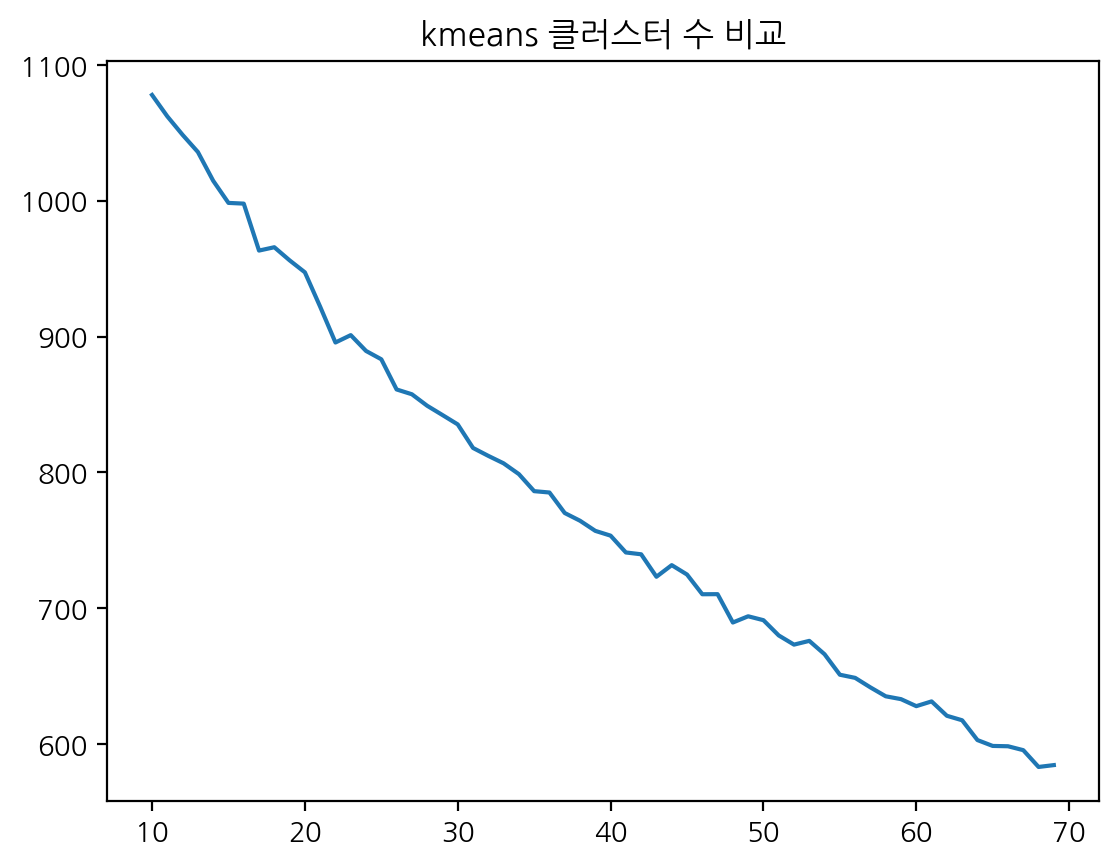

In [89]:
# 시각화

plt.plot(range(start, end), inertia)
plt.title('kmeans 클러스터 수 비교')
plt.show()

In [90]:
# 적정한 클러스터 개수 넣어 군집화 하기

n_clusters = 50
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(feature_tfidf)
prediction = kmeans.predict(feature_tfidf)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 1,  1,  1, ...,  1, 24,  1], dtype=int32)

In [91]:
df['cluster'] = prediction

In [92]:
df.head(3)

,text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트,cluster
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1


In [95]:
df['cluster'].value_counts().head(10)

cluster
1     1704
6       44
2       41
17      36
3       32
16      28
9       27
12      26
4       24
22      23
Name: count, dtype: int64

In [96]:
# MiniBatchKMeans

# batch_size 를 쓸 수 있는 미니배치 k 군집 활용
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

b_inertia = []
silhouettes = []

for i in trange(start, end):
    mkmeans = MiniBatchKMeans(n_clusters=i, random_state=42)
    mkmeans.fit(feature_tfidf)
    b_inertia.append(mkmeans.inertia_)
    silhouettes.append(silhouette_score(feature_tfidf, mkmeans.labels_))

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  2%|▏         | 1/60 [00:00<00:29,  1.97it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  3%|▎         | 2/60 [00:01<00:36,  1.61it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  5%|▌         | 3/60 [00:01<00:25,  2.23it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change

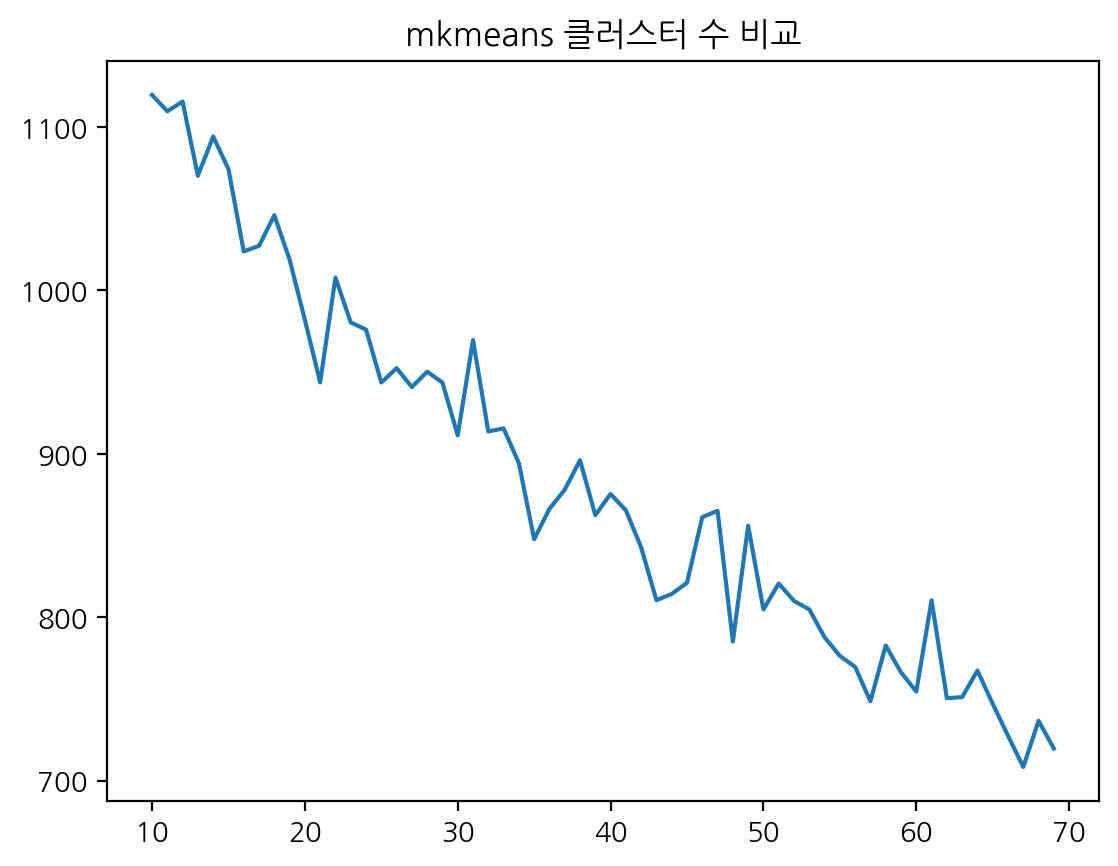

In [97]:
# 시각화

plt.plot(range(start, end), b_inertia)
plt.title('mkmeans 클러스터 수 비교')
plt.show()

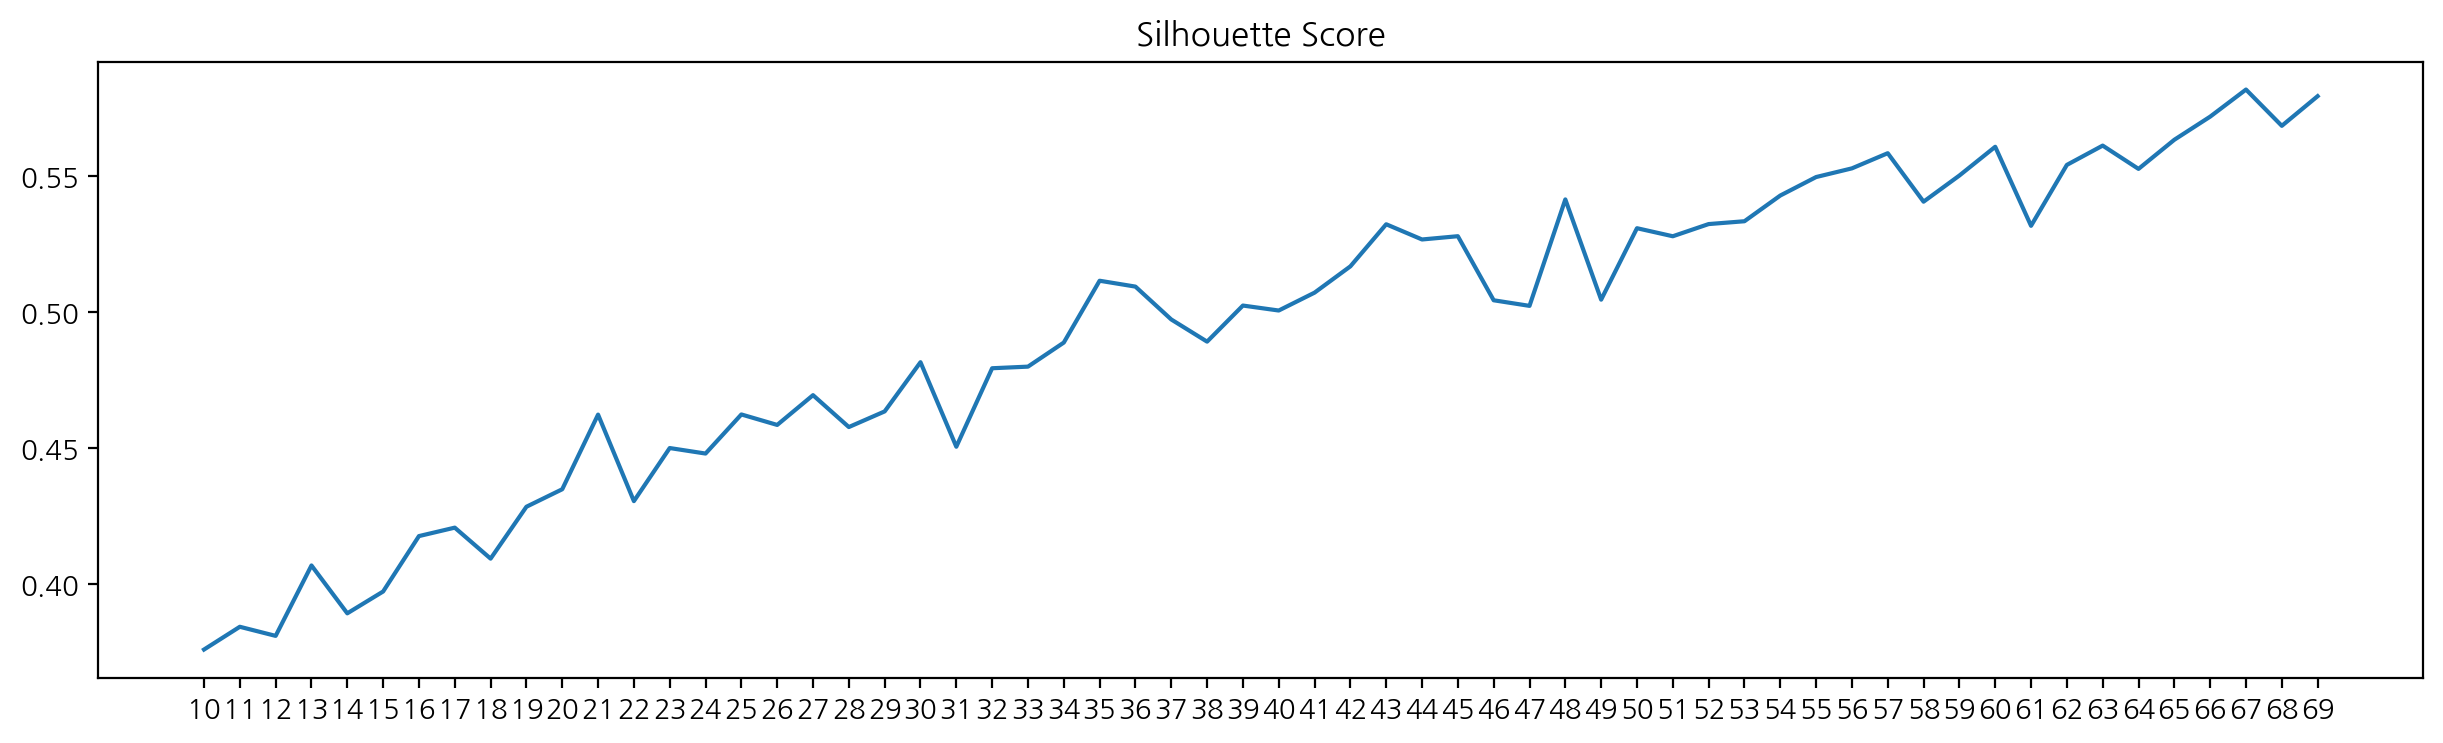

In [99]:
plt.figure(figsize=(15,4))
plt.title('Silhouette Score')
plt.plot(range(start, end), silhouettes)
plt.xticks(range(start, end))
plt.show()

In [100]:
# yellowbrick : 머신러닝 시각화 도구

!pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

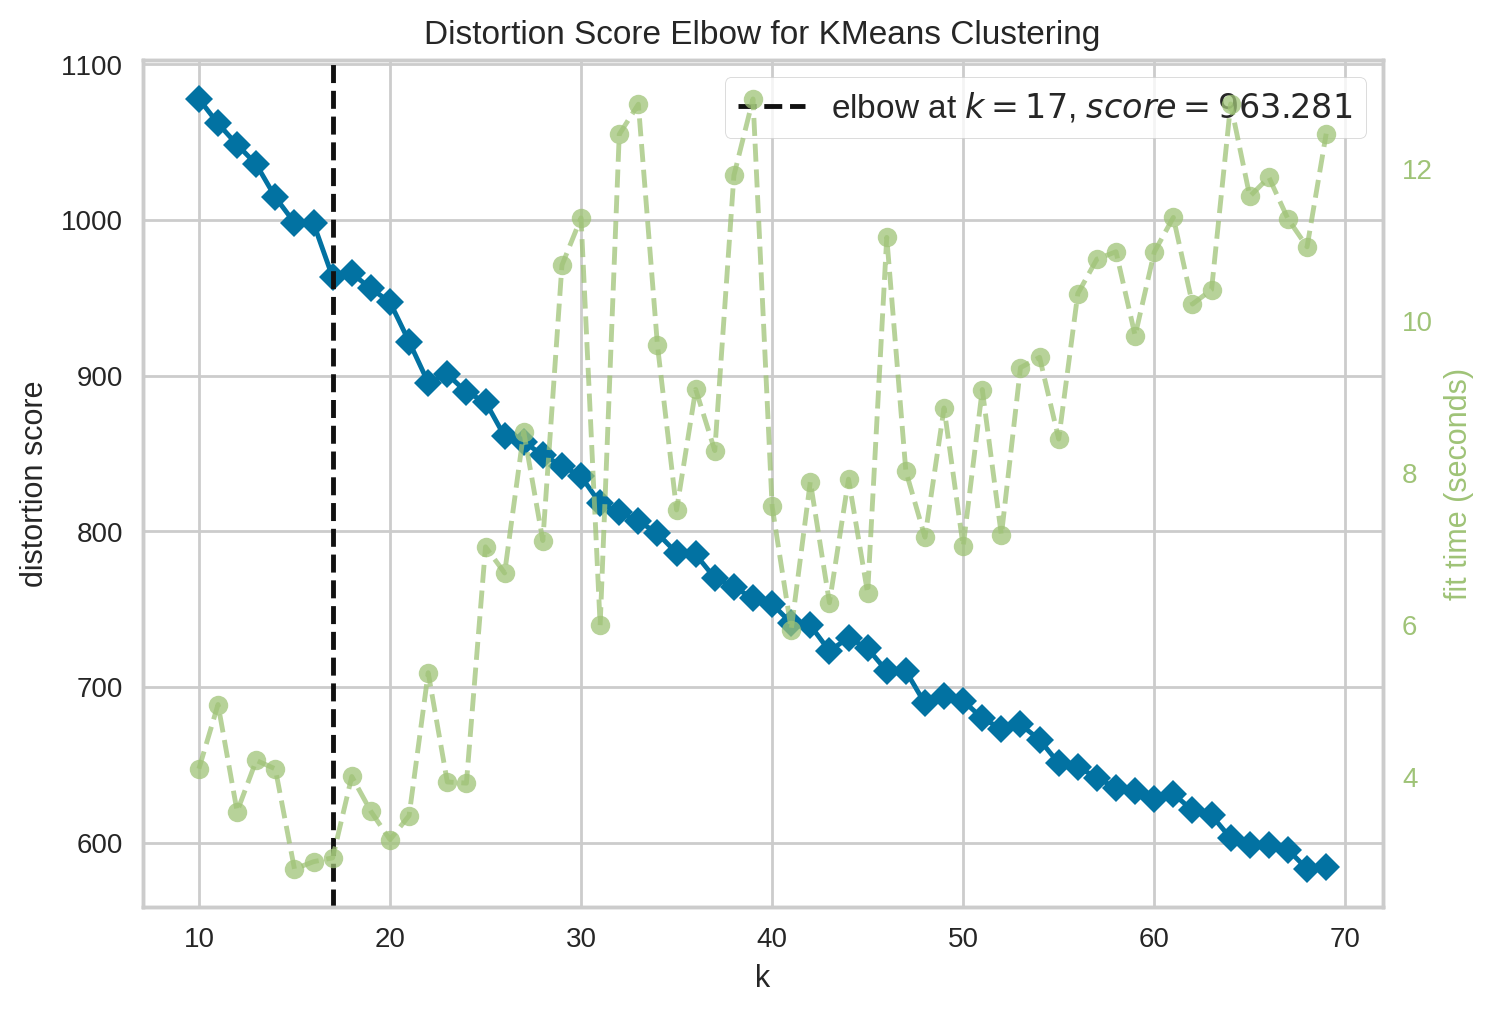

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
from yellowbrick.cluster import KElbowVisualizer

KElbowM = KElbowVisualizer(kmeans, k=(start,end))
KElbowM.fit(feature_tfidf.toarray())
KElbowM.show()

In [104]:
# MiniBatchKMeans 학습
mkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mkmeans.fit(feature_tfidf)
prediction = mkmeans.predict(feature_tfidf)
df['mbcluster'] = prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
df['mbcluster'].value_counts().head(10)

mbcluster
25    1108
0      243
3      147
9       76
7       64
38      48
1       44
47      39
27      37
22      36
Name: count, dtype: int64

In [111]:
# 어떤 강좌명이 있는지 특정 클러스터 값 보자
df.loc[df['mbcluster']==25, 'course'].value_counts().head(10)

course
  ***의 따라하며 배우는 c++    24
  스프링 웹 mvc            16
 ***의 따라하며 배우는 c++     10
  선형대수학개론               7
 스프링 시큐리티               5
 선형대수학개론                5
  스프링 시큐리티              5
 스프링 웹 mvc              5
***의 따라하며 배우는 c++       4
  파이썬                   4
Name: count, dtype: int64

In [115]:
df.columns

Index(['text', 'course', '머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터', 'django', '크롤링',
       '시각화', '데이터분석', '웹개발', '엑셀', 'c', '자바', '자바스크립트', 'node', 'vue', '리액트',
       'cluster', 'mbcluster'],
      dtype='object')

In [116]:
df.loc[df['mbcluster'] == 0, ['mbcluster', 'cluster', 'course']]

,mbcluster,cluster,course
25,0,1,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파..."
29,0,1,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기"
31,0,30,이번에 새로 vue 관련 기술을 이용하는 프로젝트에 착수하게 되었습니다.\nvue를...
33,0,1,첫번째로는 vue.js 공부하고자 합니다.\nvue.js 시작하기 - age of ...
52,0,14,공공데이터로 파이썬 데이터 분석 시작하기
...,...,...,...
2387,0,33,대세는 쿠버네티스 ^o^ (기초편)
2391,0,33,2020년 공부 목표\n- 이직과 함께 devops 직무 변환하기\n관심있는 인프런...
2427,0,26,파이썬 사용자를 위한 웹개발 입문 a to z django + bootstrap
2431,0,31,ios12 앱 개발 퍼펙트 가이드


In [117]:
# 클러스터 예측 평가

feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [129]:
feature_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [130]:
np.unique(feature_array)

array([0, 1, 2, 3])

In [118]:
np.unique(prediction)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [119]:
feature_array = feature_vector.toarray()
labels = np.unique(prediction)

df_cluster_score = []
df_cluster =[]

for label in labels:
    id_temp = np.where(prediction == label)
    # 예측한 값이 클러스터 번호 일치하면 >> 가져옴
    x_means = np.mean(feature_array[id_temp], axis=0)
    # 클러스터 평균값 구하기
    sorted_means = np.argsort(x_means)[::-1][:n_clusters]
    # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names_out()
    best_features = [(features[i], x_means[i])  for i in sorted_means]

    # 클러스터 별 전체 스코어
    df_score = pd.DataFrame(best_features, columns=['features','score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])




In [123]:
# df_cluster_score[:10]
# df_cluster

In [125]:
# 개별 클러스터에서 점수가 가장 높은 단어 추출
# >> 점수가 크며 예측정확도가 높음

pd.DataFrame(df_cluster, columns=['features', 'score']).sort_values(by=['features','score'], ascending=False)

,features,score
47,프로그래밍과 자바스크립트 es6,1.102564
18,프로그래밍 시작하기 파이썬 입문,1.000000
36,표준 jpa 프로그래밍,1.000000
39,파이썬을 이용한 it 해킹과,1.000000
21,파이썬 실전 활용,1.000000
32,파이썬 실전 활용,1.000000
28,코틀린 기반 안드로이드,0.315789
45,코드를 조작하는 다양한 방법,1.000000
12,취업을 위해 제대로 배워보는,0.117647
19,취업을 위한 알고리즘,1.000000


In [126]:
df.head(3)

,text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,...,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트,cluster,mbcluster
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1,9
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1,9
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,38


In [127]:
# score 정확도가 1이 나온 클러스터는 어떻게 되나?

df.loc[df['mbcluster'] ==28, ['mbcluster', 'cluster', 'course']]

,mbcluster,cluster,course
111,28,1,유니티 기초 강좌 - 기획부터 사용까지
122,28,1,r로 하는 텍스트마이닝 (top keyword부터 감성분석까지)
459,28,1,redux vs mobx (둘 다 배우자!)
620,28,1,컴공 대학교 졸업후 진로에 대해 생각해 볼 틈도 없이 바로 취업을 했습니다. 모바일...
992,28,1,"r로 하는 텍스트마이닝 (top keyword부터 감성분석까지), 쉽고 빠르게 끝..."
996,28,1,코틀린 기반 안드로이드 앱개발 고급 3단계
1028,28,1,2020 올해의 목표는 제가 만든 웹서비스를 출시해보는 것입니다. 웹 서비스를 만드...
1314,28,1,공부열심히 해서 올해는 꼭 개인 안드로이드 앱을 개발 & 배포하겠습니다 !!\n/ ...
1319,28,1,코틀린 기반 안드로이드 앱개발 기본 1단계
1385,28,1,"코틀린 기반 안드로이드 앱 1~3, flutter 입문~중급"


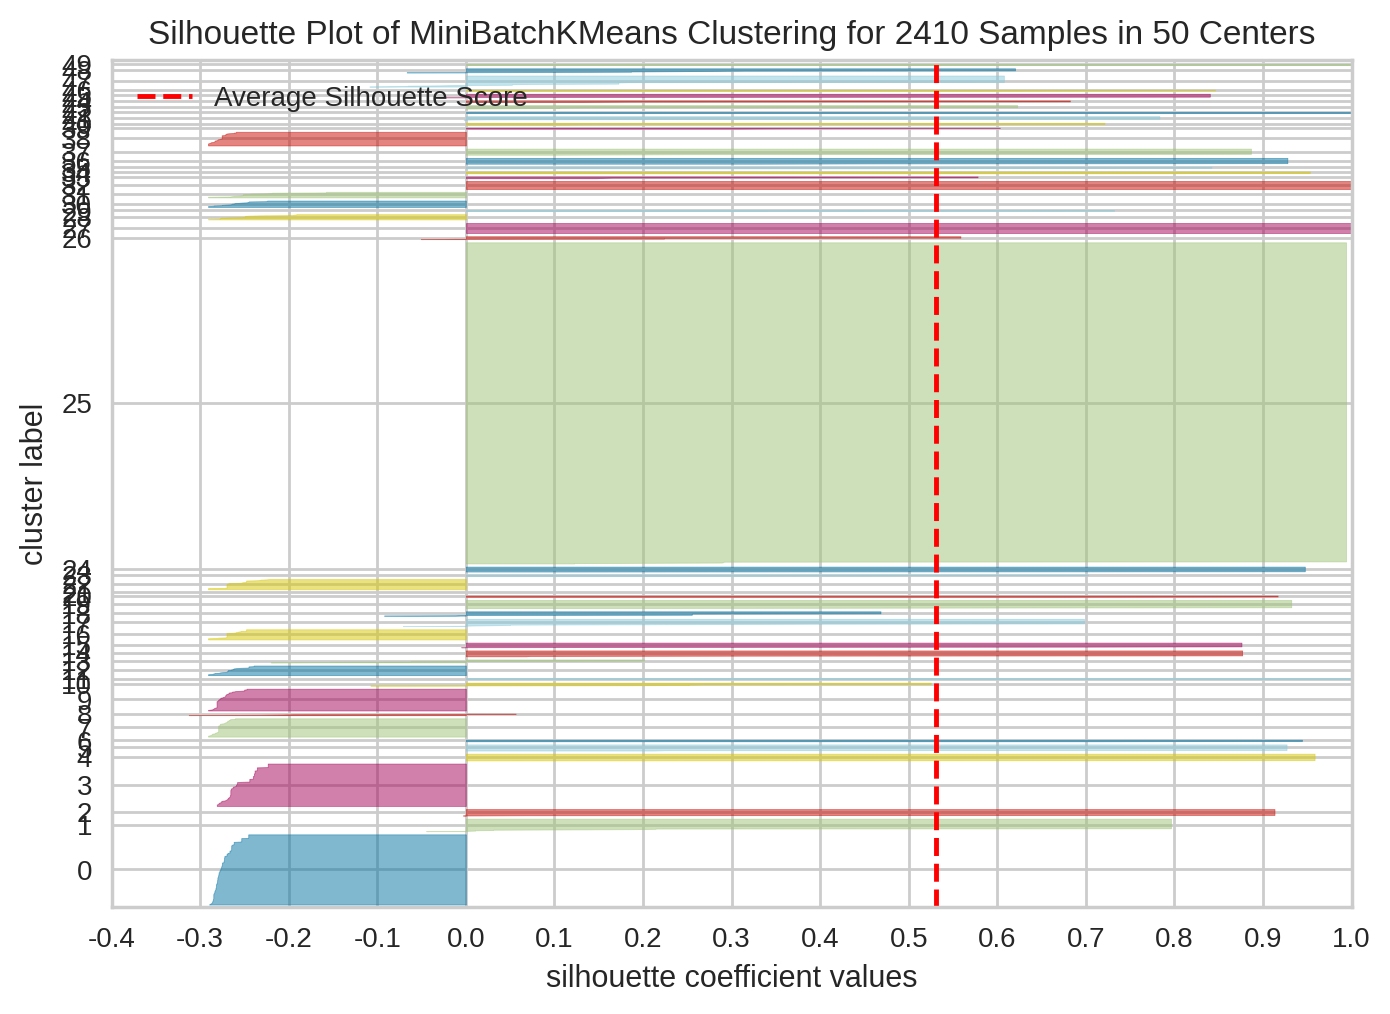

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 2410 Samples in 50 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [128]:
from yellowbrick.cluster import SilhouetteVisualizer

vis = SilhouetteVisualizer(mkmeans, colors='yellowbrick')
vis.fit(feature_tfidf.toarray())
vis.show()

split 심화학습

In [28]:
import pandas as pd

data = {'text': ['This is a test 관심강의 Math', 'Another test 관심강의 Science', 'Just text']}
temp = pd.DataFrame(data)

In [29]:
temp

,text
0,This is a test 관심강의 Math
1,Another test 관심강의 Science
2,Just text


In [30]:
temp['text']

0     This is a test 관심강의 Math
1    Another test 관심강의 Science
2                    Just text
Name: text, dtype: object

In [31]:
temp['text'].apply(lambda x: x.split('관심강의'))

0     [This is a test ,  Math]
1    [Another test ,  Science]
2                  [Just text]
Name: text, dtype: object

In [32]:
temp['text'].apply(lambda x: x.split('관심강의')[-1])

0         Math
1      Science
2    Just text
Name: text, dtype: object